File: Elevator Height.ipynb \
Date: 5/04/2023, 12:00 AM\
Author: Vishaal Lingam

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [186]:
# Load data
file = "Raw Data.csv"
df = pd.read_csv(file)
s = df.to_numpy()
t, ax, ay, az, amag = s.T
az = az[np.where(t<=22.9)]
t = t[np.where(t<=22.9)]
offset = sum(az[np.where(t<=1)])/np.size(np.where(t<=1))
az = az-offset # offset fixing
offset

0.03907027066016219

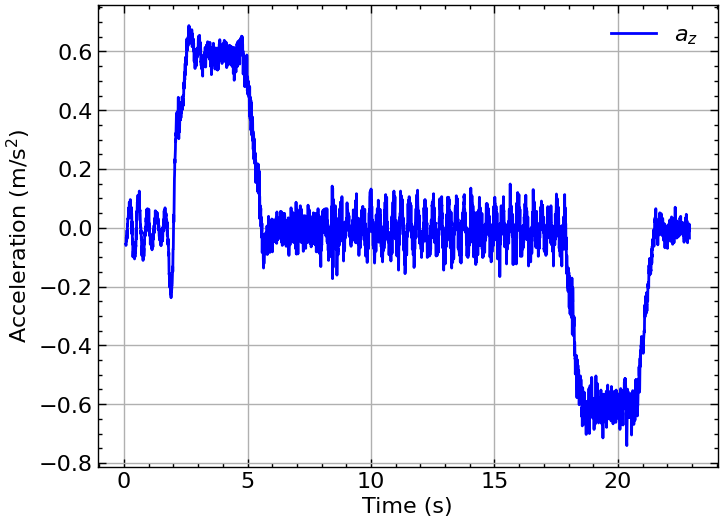

In [187]:
# Acceleration data
#plt.plot(t, ax, 'g-', label="$a_x$")
#plt.plot(t, ay, 'r-', label="$a_y$")
plt.plot(t, az, 'b-', label="$a_z$")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s$^2$)")
plt.grid()
plt.style.use(['science','notebook'])
plt.show()

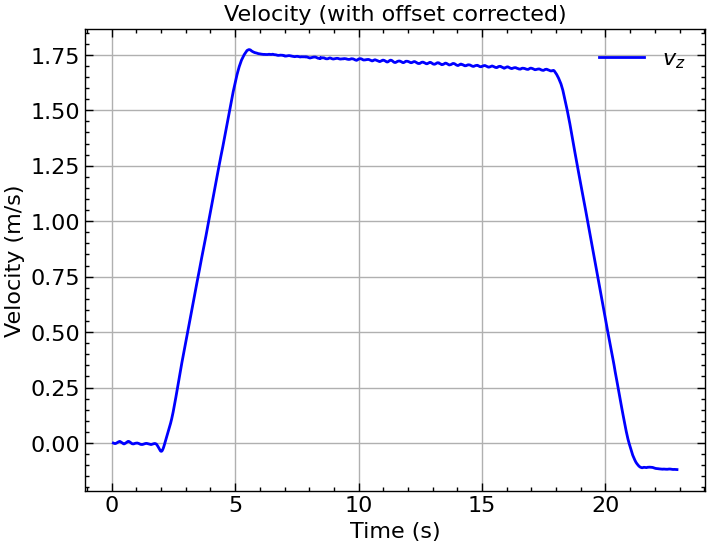

In [188]:
# Velocity: first numerical integration over time

dt = t[1]-t[0]
vx=vy=vz=vmag=[0]
for i in np.arange(len(t)-1):
    vx = vx + [vx[-1] + ax[i]*dt]
    vy = vy + [vy[-1] + ay[i]*dt]
    vz = vz + [vz[-1] + az[i]*dt]

#plt.plot(t, vx, 'g-', label="$v_x$")
#plt.plot(t, vy, 'r-', label="$v_y$")
plt.plot(t, vz, 'b-', label="$v_z$")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity (with offset corrected)")
plt.legend()
plt.grid()
plt.style.use(['science','notebook'])
plt.show()
    


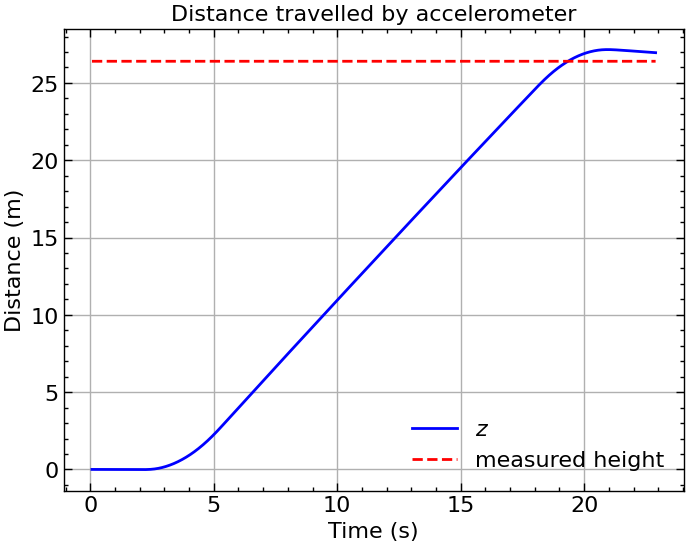

In [189]:
# Position: second numerical integration over time
dt = t[1]-t[0]
x=y=z=a=[0]
for i in np.arange(len(t)-1):
    x = x + [x[-1] + vx[i]*dt]
    y = y + [y[-1] + vy[i]*dt]
    z = z + [z[-1] + vz[i]*dt]

x_ = 26.4*np.ones(len(t))
#plt.plot(t, x, 'g-', label="$x$")
#plt.plot(t, y, 'r-', label="$y$")
plt.plot(t, z, 'b-',label="$z$")
plt.plot(t,x_, 'r--',label="measured height")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Distance travelled by accelerometer")
plt.legend()
plt.grid()
plt.style.use(['science','notebook'])
plt.show()

In [190]:
# Error calculation 
h_stair = 15 # we need to actually measure the stair heights
num_stairs_floor = 22
floors = 9
height = (floors-1)*num_stairs_floor*h_stair
print('True height', height/100, 'm')
print('Accelerometer height', round(z[-1],2),'m')
Error = abs((height/100) - z[-1])/(height/100)
Error=Error*100
print('Error', round(Error,2), '%')

True height 26.4 m
Accelerometer height 26.95 m
Error 2.1 %
